In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import cv2
import matplotlib.pyplot as plt

#Training Model with MNIST data set

In [13]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train/255
X_test = X_test/255
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
model = keras.Sequential([keras.layers.Dense(100, input_shape =(784,),activation = 'relu'),
                         keras.layers.Dense(10, activation = 'sigmoid')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_flatten, y_train, epochs = 10,batch_size=32)
model.evaluate(X_test_flatten, y_test)
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Epoch 1/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.2891 - accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 1s 738us/step - loss: 0.1333 - accuracy: 0.9606
Epoch 3/10
1875/1875 [==============================] - 1s 736us/step - loss: 0.0975 - accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.0757 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 2s 814us/step - loss: 0.0609 - accuracy: 0.9811
Epoch 6/10
1875/1875 [==============================] - 1s 780us/step - loss: 0.0482 - accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.0413 - accuracy: 0.9870
Epoch 8/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.0343 - accuracy: 0.9893
Epoch 9/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.0282 - accuracy: 0.9914
Epoch 10/10
313/313 [==============================] - 1s 2ms/st

#Getting Images of 0 to 1

In [266]:
image_list=[]
for i in range(0,10):
    image='image'+str(i)+'.png'
    image_list.append(image)
print('image_list: ',image_list)


image_list:  ['image0.png', 'image1.png', 'image2.png', 'image3.png', 'image4.png', 'image5.png', 'image6.png', 'image7.png', 'image8.png', 'image9.png']


#Predicting images from 0 to 9

In [271]:
#images 0 to 9 prediction
import time
predict_list=[]
for image in image_list:
    #print(image)
    file= image
    #print(file)
    test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)
    img2_resized= img_resized/255
    #print(img_resized)
    img_resized_flatten = img2_resized.reshape(1, 28*28)
    y_predicted = model.predict(img_resized_flatten)
    y_predicted_labels = [np.argmax(i) for i in y_predicted]
    #print(y_predicted_labels)
    predict_list.append(y_predicted_labels)
    #time.sleep(3)
print(predict_list)
    

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]


#Test prediction for any single image

In [270]:
file= 'image3.png' #test image
#print(file)
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)
img2_resized= img_resized/255
#print(img_resized)
img_resized_flatten = img2_resized.reshape(1, 28*28)
y_predicted = model.predict(img_resized_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels)

[3]


#Reading the images of Sudoku grid(81 cell images) in to list

#Reading images of SUDOKU GRID

In [241]:
image_list=[]
for i in range(0,9):
    for j in range(0,9):
        image='cell'+str(i)+str(j)+'.png'
        image_list.append(image)
print('image_list: ',image_list)


image_list:  ['cell00.png', 'cell01.png', 'cell02.png', 'cell03.png', 'cell04.png', 'cell05.png', 'cell06.png', 'cell07.png', 'cell08.png', 'cell10.png', 'cell11.png', 'cell12.png', 'cell13.png', 'cell14.png', 'cell15.png', 'cell16.png', 'cell17.png', 'cell18.png', 'cell20.png', 'cell21.png', 'cell22.png', 'cell23.png', 'cell24.png', 'cell25.png', 'cell26.png', 'cell27.png', 'cell28.png', 'cell30.png', 'cell31.png', 'cell32.png', 'cell33.png', 'cell34.png', 'cell35.png', 'cell36.png', 'cell37.png', 'cell38.png', 'cell40.png', 'cell41.png', 'cell42.png', 'cell43.png', 'cell44.png', 'cell45.png', 'cell46.png', 'cell47.png', 'cell48.png', 'cell50.png', 'cell51.png', 'cell52.png', 'cell53.png', 'cell54.png', 'cell55.png', 'cell56.png', 'cell57.png', 'cell58.png', 'cell60.png', 'cell61.png', 'cell62.png', 'cell63.png', 'cell64.png', 'cell65.png', 'cell66.png', 'cell67.png', 'cell68.png', 'cell70.png', 'cell71.png', 'cell72.png', 'cell73.png', 'cell74.png', 'cell75.png', 'cell76.png', 'cell7

#predicting given set of images and appending it to a list using our trained model

In [246]:
import time
predict_list=[]
for image in image_list:
    #print(image)
    file= image
    #print(file)
    test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)
    img2_resized= img_resized/255
    #print(img_resized)
    img_resized_flatten = img2_resized.reshape(1, 28*28)
    y_predicted = model.predict(img_resized_flatten)
    y_predicted_labels = [np.argmax(i) for i in y_predicted]
    #print(y_predicted_labels)
    predict_list.append(y_predicted_labels)
    #time.sleep(3)
    
print(predict_list)


[[5], [0], [3], [0], [0], [0], [0], [0], [0], [2], [0], [0], [3], [0], [0], [0], [0], [0], [0], [4], [0], [7], [1], [0], [2], [0], [3], [0], [0], [5], [4], [0], [0], [0], [7], [1], [0], [0], [4], [2], [0], [1], [8], [0], [0], [6], [8], [0], [0], [0], [7], [5], [0], [0], [1], [0], [7], [0], [6], [9], [0], [3], [0], [0], [0], [0], [0], [0], [4], [0], [0], [6], [0], [0], [0], [0], [0], [0], [9], [0], [5]]


In [247]:
def sudoku_input():
    #predict_list = [[0], [3], [6], [2], [0], [0], [0], [3], [6], [0], [0], [5], [9], [0], [5], [2], [8], [0], [4], [0], [0], [5], [8], [0], [4], [2], [0], [3], [7], [4], [0], [8], [2], [5], [6], [0], [3], [0], [0], [0], [6], [0], [8], [2], [3], [7], [9], [1], [0], [4], [0], [9], [4], [1], [0], [6], [7], [4], [1], [0], [0], [2], [4], [0], [2], [7], [7], [7], [2], [0], [4], [2], [9], [7], [7], [7], [7], [1], [7], [2], [0]]
    my_array = np.array(predict_list)
    #print(my_array)
    sudoku_input = np.reshape(my_array, (9,9))
    print('sudoku input matrix\n',sudoku_input)
sudoku_input()

sudoku input matrix
 [[5 0 3 0 0 0 0 0 0]
 [2 0 0 3 0 0 0 0 0]
 [0 4 0 7 1 0 2 0 3]
 [0 0 5 4 0 0 0 7 1]
 [0 0 4 2 0 1 8 0 0]
 [6 8 0 0 0 7 5 0 0]
 [1 0 7 0 6 9 0 3 0]
 [0 0 0 0 0 4 0 0 6]
 [0 0 0 0 0 0 9 0 5]]


sudoku input matrix
 [[5 0 3 0 0 0 0 0 0]
 [2 0 0 3 0 0 0 0 0]
 [0 4 0 7 1 0 2 0 3]
 [0 0 5 4 0 0 0 7 1]
 [0 0 4 2 0 1 8 0 0]
 [6 8 0 0 0 7 5 0 0]
 [1 0 7 0 6 9 0 3 0]
 [0 0 0 0 0 4 0 0 6]
 [0 0 0 0 0 0 9 0 5]]
#picture 50

sudoku input matrix
 [[5 0 3 0 0 0 0 0 0]
 [2 0 0 3 0 0 0 0 0]
 [0 4 0 7 1 0 2 0 3]
 [0 0 5 4 0 0 0 7 1]
 [0 0 4 2 0 1 8 0 0]
 [6 8 0 0 0 7 5 0 0]
 [1 0 7 0 6 9 0 3 0]
 [0 0 0 0 0 4 0 0 6]
 [0 0 0 0 0 0 3 0 5]
 # for picture22

#Plotting original image

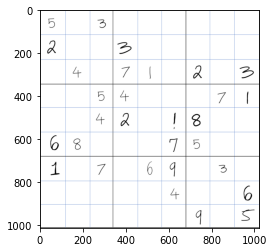

In [248]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from matplotlib import pyplot
img = mpimg.imread('picture50.png')
imgplot = plt.imshow(img)
plt.show()